In [ ]:
data_no=input()

1


In [ ]:
ji=data_no

In [ ]:
!pip install mne

     |████████████████████████████████| 6.6MB 686kB/s 


In [ ]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
path='/content/drive/My Drive/EEG SIGNAL PROCESSING NEW/sourcedata (1)/sub-01/eeg/'

In [ ]:
filename="sub-01_ses-"+ji+"_task-BreathCounting_eeg.bdf"

In [ ]:
filename

'sub-01_ses-1_task-BreathCounting_eeg.bdf'

In [ ]:
rawPath=path+filename

In [ ]:
rawPath

'/content/drive/My Drive/EEG SIGNAL PROCESSING NEW/sourcedata (1)/sub-01/eeg/sub-01_ses-1_task-BreathCounting_eeg.bdf'

In [ ]:
#rawPath='/content/drive/My Drive/Colab Notebooks/sourcedata/sub-01/eeg/sub-01_ses-10_task-BreathCounting_eeg.bdf'
raw=mne.io.read_raw_bdf(rawPath,preload=True)

Extracting EDF parameters from /content/drive/My Drive/EEG SIGNAL PROCESSING NEW/sourcedata (1)/sub-01/eeg/sub-01_ses-1_task-BreathCounting_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1937407  =      0.000 ...  1891.999 secs...


In [ ]:
print(raw)
print(raw.info)

<RawEDF | sub-01_ses-1_task-BreathCounting_eeg.bdf, 80 x 1937408 (1892.0 s), ~1.15 GB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 79 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 208.0 Hz
 meas_date: 2010-03-31 15:41:13 UTC
 nchan: 80
 projs: []
 sfreq: 1024.0 Hz
>


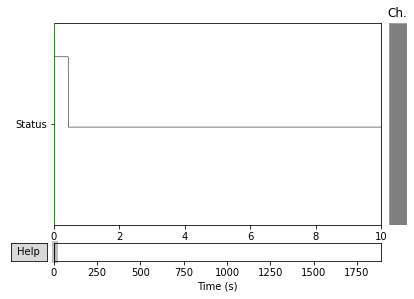

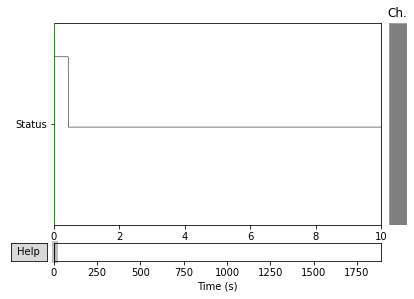

In [ ]:
raw.copy().pick_types(stim=True).plot()

In [ ]:
events = mne.find_events(raw,initial_event=True)
print(events)
"""
All events that were found. 
The first column contains the event time in samples and the third column contains the event id.
For output = ‘onset’ or ‘step’, the second column contains the value of the stim channel immediately before the event/step. For output = ‘offset’,
 the second column contains the value of the stim channel after the event offset.
"""

1283 events found
Event IDs: [   10    20    21    30    31    50 65536]
[[      0       0   65536]
 [  95751       0      10]
 [  96804       0      10]
 ...
 [1879194       0      20]
 [1880218       0      20]
 [1880387       0      50]]


In [ ]:
#interpolate empty data
raw.interpolate_bads(reset_bads=False) 
#bad data is channel having excessive noise

"""
It is possible in such cases to remove each channel that is bad for even a single subject, 
but that can lead to a dramatic drop in data rank (and ends up discarding a fair amount of clean data in the process).
In such cases it is desirable to reconstruct bad channels by interpolating its signal based on the signals of the good sensors around them.
"""

<ipython-input-15-2f5c9d7e3f69>:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(reset_bads=False)


<RawEDF | sub-01_ses-1_task-BreathCounting_eeg.bdf, 80 x 1937408 (1892.0 s), ~1.15 GB, data loaded>

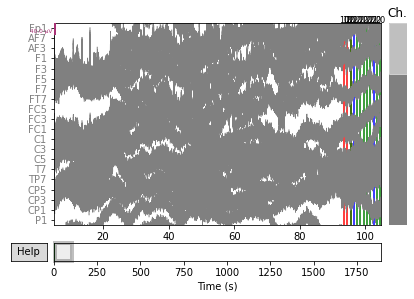

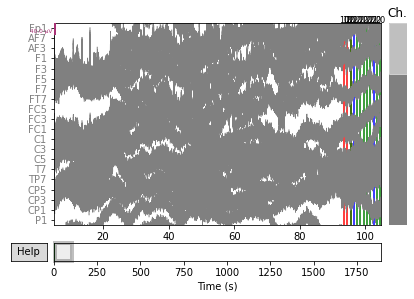

In [ ]:
raw.plot(events=events, start=5, duration=100, color='gray',
         event_color={10: 'r', 20: 'g', 21: 'b', 30: 'm', 31: 'y', 50: 'k'})

In [ ]:
raw.filter(l_freq=0.5,h_freq=50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 6759 samples (6.601 sec)



<RawEDF | sub-01_ses-1_task-BreathCounting_eeg.bdf, 80 x 1937408 (1892.0 s), ~1.15 GB, data loaded>

In [1]:
raw.resample(sfreq=200)

NameError: ignored

In [ ]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [ ]:
ica.fit(raw.copy())

Fitting ICA to data using 79 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 12.2s.


<ICA  |  raw data decomposition, fit (fastica): 378400 samples, 20 components, channels used: "eeg">

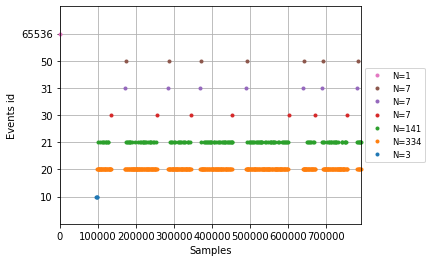

In [ ]:
mne.viz.plot_events(events[:500]);

In [ ]:
event_ids = {"qsn start":30,"qsn end":31,"start count":50}

epochs = mne.Epochs(raw, events, event_id=event_ids)

79 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 79 events and 141 original time points ...
70 bad epochs dropped
Loading data for 9 events and 141 original time points ...
Loading data for 9 events and 141 original time points ...


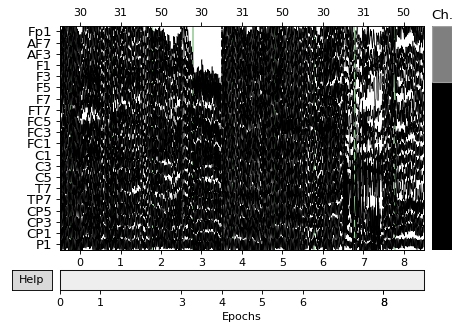

<Epochs  |   9 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~159 kB, data not loaded,
 'qsn end': 3
 'qsn start': 3
 'start count': 3>

In [ ]:

epochs.plot();
epochs


In [ ]:
epochs = mne.Epochs(raw, events, event_id=event_ids, preload=True)

epochs = ica.apply(epochs, exclude=ica.exclude)

79 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 79 events and 141 original time points ...
70 bad epochs dropped
Transforming to ICA space (20 components)
Zeroing out 0 ICA components


In [ ]:
epochs.equalize_event_counts(event_ids)
epochs

Dropped 0 epochs: 


<Epochs  |   9 events (all good), -0.2 - 0.5 sec, baseline [None, 0], ~952 kB, data loaded,
 'qsn end': 3
 'qsn start': 3
 'start count': 3>

In [ ]:
path1="/content/drive/My Drive/mukesh_sir_ml_project/"

In [ ]:
pwd

'/content'

In [ ]:
savepath=path1+"preprocessed_new"+ji+".bdf"

In [ ]:
savepath

'/content/drive/My Drive/mukesh_sir_ml_project/preprocessed_new1.bdf'

In [ ]:
epochs.save(savepath,overwrite=True)

Overwriting existing file.


<ipython-input-31-c8bded4919d1>:1: RuntimeWarning: This filename (/content/drive/My Drive/mukesh_sir_ml_project/preprocessed_new1.bdf) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(savepath,overwrite=True)
